Importing th dependencies


In [ ]:
import numpy as np                  #For making numpy Arrays
import pandas as pd                 #For making Data Frames
import matplotlib.pyplot as plt     #Data Visualization
import seaborn as sns               #Data Visualization
from sklearn.cluster import KMeans  #Clustering Algorithm

Data Collection & Analysis

In [ ]:
# Loading the data from csv to a pandas data frame:
customer_data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
# Inspect the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Count Rows & Columns 
# Result: (rows,cols)
customer_data.shape

(200, 5)

In [ ]:
# Getting Insights about the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We group Data based on spending & Income which is needed for clustering.

-> Choosing Annual Income % Spending Score Column

In [ ]:
# dataframe.iloc[[row range], [column range]]
# Zero-Indexed
X = customer_data.iloc[:,[3,4]].values

In [ ]:
print(X)
#RESULT: 

Choosing number of Clusters which is optimum for this Data Set
We use a parameter -> WCSS (Within Clusters Sum of Squares)

WCSS is a measure of the variability of the observations within each cluster.
The average distance from observations to the cluster centroid is a measure of the variability of the observations within each cluster. In general, a cluster that has a smaller average distance is more compact than a cluster that has a larger average distance. Clusters that have higher values exhibit greater variability of the observations within the cluster.
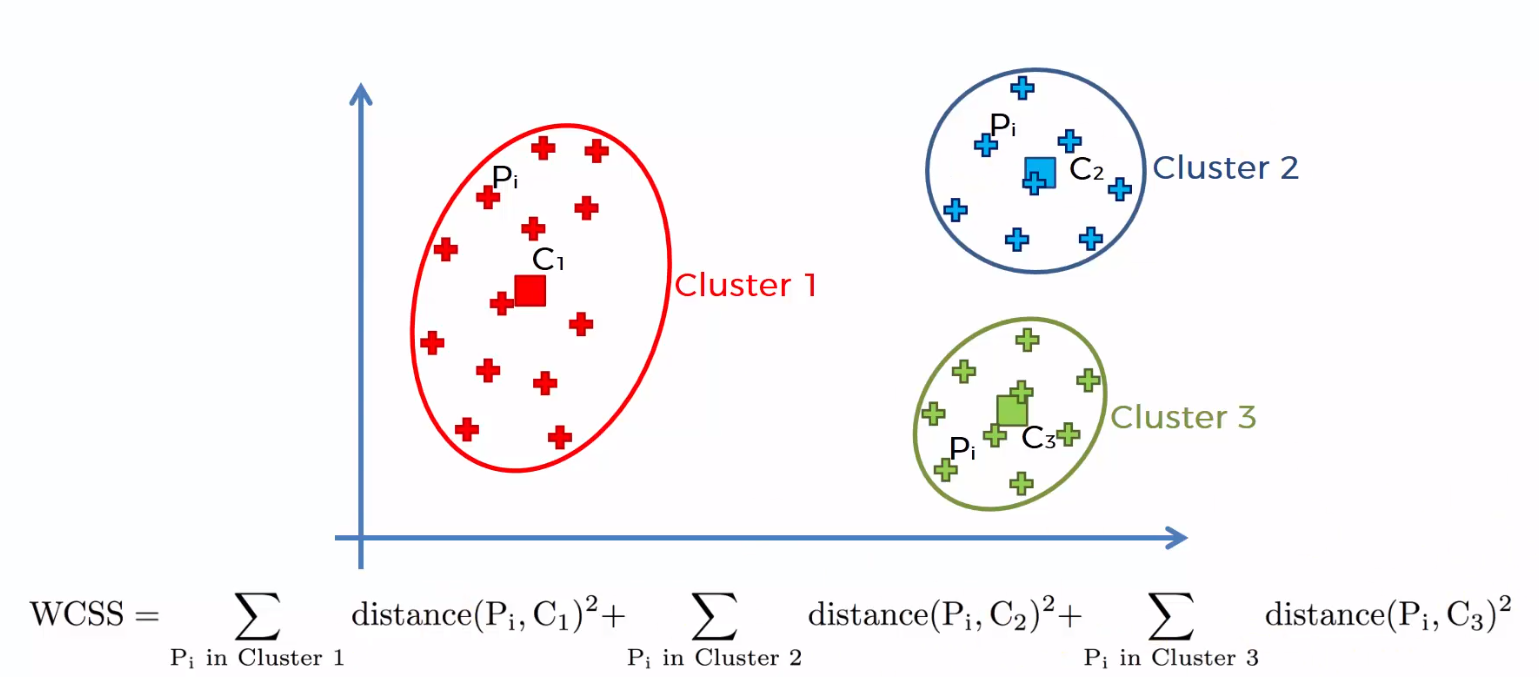

In [ ]:
# Finding WCSS value for different number of clusters (1->10): We try to find for which count of cluster we have minimum WCSS value

wcss = []

for i in range(1,11):
  # init='k-means++' Initiation Step is best among others
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  #.inertia_ : gives us the wcss value for the cluster
  wcss.append(kmeans.inertia_)

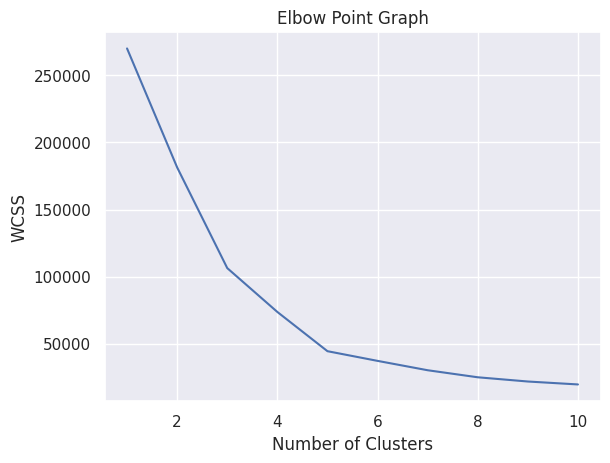

In [15]:
# Plotting an Elbow Graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Chosing the elbow point, beyond which there is no significant drop(elbow point)
Here it would be '5' Number of clusters

Training the k-means Clustering Model (Unsupervised Learning)

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each Data Point based on which cluster they belong
Y = kmeans.fit_predict(X)
print (Y)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters = 0,1,2,3,4

The above warning is a scikit problem : [GitHub Open Issue](https://github.com/scikit-learn/scikit-learn/discussions/25016#discussioncomment-4227747)

Visualizing all the clusters!

1. Centroid will be plotted first
2. Data Points will be plotted
3. Centroid will be rearranged base of cluster Data Points


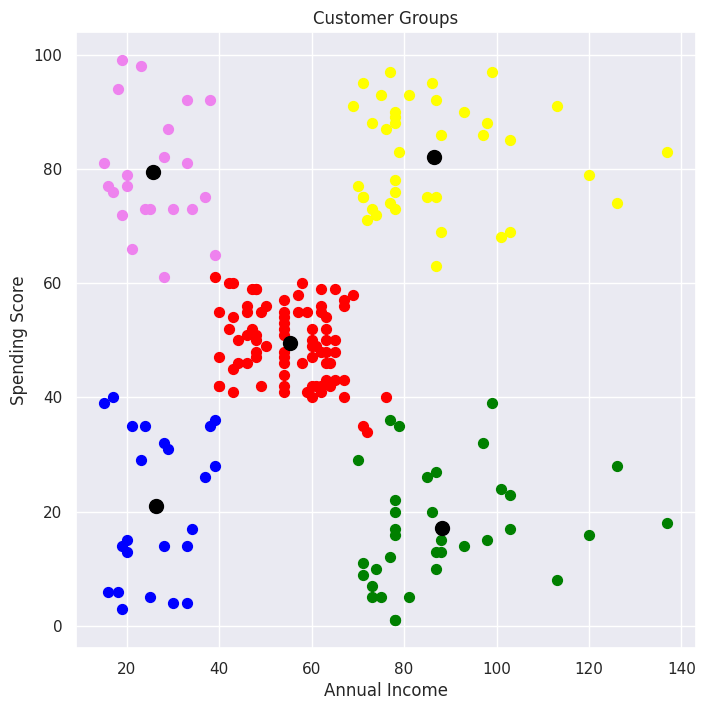

In [18]:
# Plotting all the clusters and their data points

plt.figure(figsize=(8,8))


# plt.scatter(X[Y==Cluster Value, Column Number in X (Annual Income)], X[Y==Cluster Value, Column Number in X (Annual Income)], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# Plot the centroids

# .cluster_centers_[:,0 => X-axis value of centroid] // .cluster_centers_[:,1 => Y-axis value of centroid]
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],  s=100, c='black', label='centroid')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.show()

INSIGHTS: 
1. Cluster 4: Don't have High annual income but high spending score (Very less such people)

2. Cluster 5: Don't have High annual income also low spending score (People with less income buy less -> Understandable)

     -> Give Offers and better Discounts with some membership card.

3. Cluster 1: Have High annual income still low spending score (Are conscious of what they buy -> which has obviously made them richer)

  -> Get Business insights and place products that this cadre of people tend to buy, which is generally branded and high quality product.

4. Cluster 3: Have High annual income along with high spending score (They are comfortable in spending)

5. Cluster 2: Have average annual income and spending score (Most cutomers fall in this category, which shows a upper-middle class people who can't be manipulated easily)

  -> Giving more lucrative value for money offers attracts this category of customers!

